In [5]:
%load_ext autoreload
%autoreload 2
import pandas as pd 
import numpy as np
from utils.main_utils import autolabel_bar,bin_rate,categorical_rate

In [6]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [7]:
train_df.columns = [c.lower() for c in train_df.columns]
test_df.columns = [c.lower() for c in test_df.columns]
train_df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.describe()

,passengerid,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
for c in train_df.columns:
    null=train_df[c].isnull().sum()
    if null>0:
        print(f'{c} have {null} null values')

age have 177 null values
cabin have 687 null values
embarked have 2 null values


In [10]:
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

In [11]:
s = train_df[train_df.survived > 0]
ns = train_df[train_df.survived <= 0]
print(f's:{len(s)} ns:{len(ns)}')

s:342 ns:549


Text(0.5, 1.0, 'Not survived')

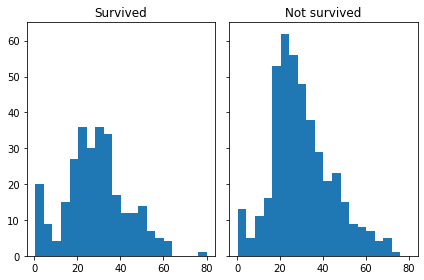

In [12]:

n_bins = 20

# Generate a normal distribution, center at x=0 and y=5
s_age = s.age[s.age.notnull()].astype(int)
ns_age = ns.age[ns.age.notnull()].astype(int)

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the `bins` kwarg
rge = (train_df.age.min(), train_df.age.max())

axs[0].hist(s_age, bins=n_bins, range=rge)
axs[0].set_title("Survived")

axs[1].hist(ns_age, bins=n_bins, range=rge)
axs[1].set_title("Not survived")

In [13]:
age_bins = [-2,0,5,10,15,25,30,35,40,45,55,80]
train_df.age = train_df.age.fillna(-1) 

age_rate_male = bin_rate(train_df.age[train_df.sex=='male'],
                    train_df.survived > 0, 
                    20, 
                    age_bins)
age_rate_male

,total_bins_count,true_bins_count,rate
"(-2, 0]",124,16,0.129032
"(0, 5]",23,15,0.652174
"(5, 10]",10,4,0.400000
"(10, 15]",7,2,0.285714
"(15, 25]",139,16,0.115108
"(25, 30]",72,15,0.208333
"(30, 35]",58,15,0.258621
"(35, 40]",42,8,0.190476
"(40, 45]",29,6,0.206897
"(45, 55]",42,8,0.190476


In [14]:
age_rate_female = bin_rate(train_df.age[train_df.sex=='female'],
                    train_df.survived > 0, 
                    20, 
                    age_bins)
age_rate_female

,total_bins_count,true_bins_count,rate
"(-2, 0]",53,36,0.679245
"(0, 5]",21,16,0.761905
"(5, 10]",10,3,0.300000
"(10, 15]",12,9,0.750000
"(15, 25]",79,59,0.746835
"(25, 30]",36,27,0.750000
"(30, 35]",30,26,0.866667
"(35, 40]",25,20,0.800000
"(40, 45]",18,11,0.611111
"(45, 55]",21,18,0.857143


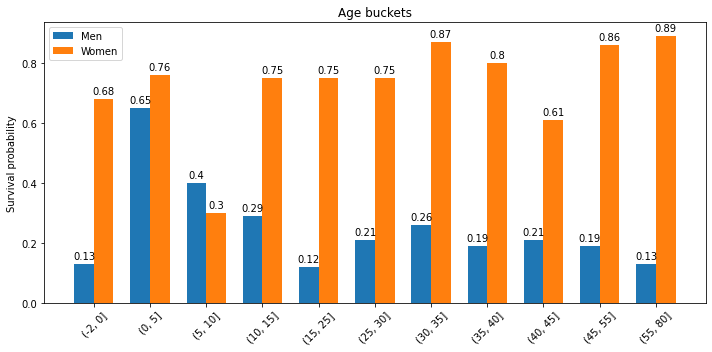

In [15]:
bins = [str(age_interval) for age_interval in age_rate_male.index]
age_rate_male.rate = age_rate_male.rate.round(2)
age_rate_female.rate = age_rate_female.rate.round(2)

x = np.arange(len(bins))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 5))

rects1 = ax.bar(x-width/2, age_rate_male.rate, width, label='Men')
rects2 = ax.bar(x+width/2, age_rate_female.rate, width, label='Women')

ax.set_ylabel('Survival probability')
ax.set_title('Age buckets')
ax.set_xticks(x)
ax.set_xticklabels(bins, rotation=45)
ax.legend()
        
autolabel_bar(ax, rects1)
autolabel_bar(ax, rects2)

fig.tight_layout()
plt.show()

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

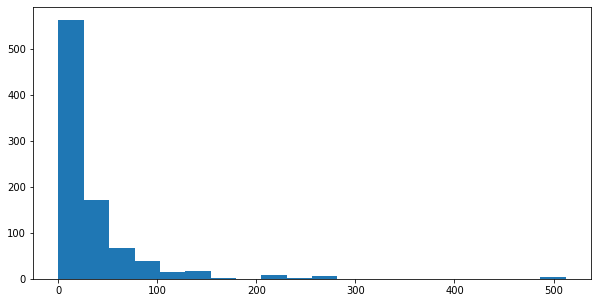

In [16]:
fig,ax = plt.subplots(figsize=(10,5))

fares = train_df.fare.fillna(-1)#[train_df.fare < 150]
fare_range = (fares.min(), fares.max())


ax.hist(fares,bins=20,range=fare_range)

In [17]:
fare_bins = [-2,0,7.5,8,8.5,9,10,15,20,30,40,60,80,100,600]
fare_rates = bin_rate(var=fares, 
                      target=train_df.survived > 0,
                      bins=fare_bins)
fare_rates

,total_bins_count,true_bins_count,rate
"(-2.0, 0.0]",15,1,0.066667
"(0.0, 7.5]",72,11,0.152778
"(7.5, 8.0]",154,40,0.259740
"(8.0, 8.5]",52,7,0.134615
"(8.5, 9.0]",20,3,0.150000
"(9.0, 10.0]",23,5,0.217391
"(10.0, 15.0]",122,47,0.385246
"(15.0, 20.0]",57,29,0.508772
"(20.0, 30.0]",142,63,0.443662
"(30.0, 40.0]",58,23,0.396552


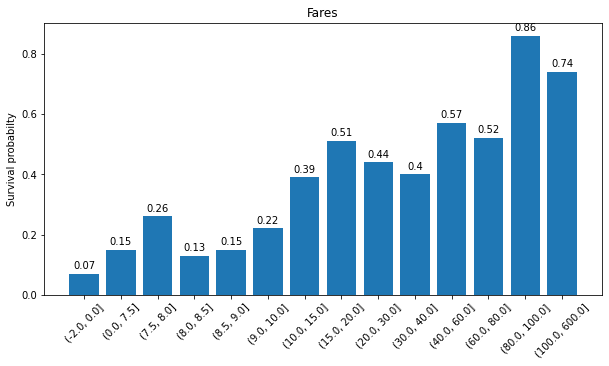

In [18]:
fare_rates.rate = fare_rates.rate.round(2)
fig,ax = plt.subplots(figsize=(10,5))
x = np.arange(len(fare_rates.index))
width = 0.35

rects = ax.bar(x, fare_rates.rate)
ax.set_title("Fares")
ax.set_ylabel("Survival probabilty")
ax.set_xticks(x)
ax.set_xticklabels(fare_rates.index, rotation=45)
autolabel_bar(ax, rects)


In [19]:
df = train_df.copy()
df.loc[df.parch >= 3, 'parch'] = 3
categorical_rate(df.parch, train_df.survived > 0)

,total_cat_count,true_cat_count,rate
0,678,233,0.343658
1,118,65,0.550847
2,80,40,0.500000
3,15,4,0.266667


In [20]:
df = train_df.copy()
df.loc[df.sibsp >= 3 , 'sibsp'] = 3
categorical_rate(df.sibsp, train_df.survived > 0)

,total_cat_count,true_cat_count,rate
0,608,210,0.345395
1,209,112,0.535885
2,28,13,0.464286
3,46,7,0.152174


In [21]:
categorical_rate(train_df.embarked,train_df.survived > 0)

,total_cat_count,true_cat_count,rate
C,168,93,0.553571
Q,77,30,0.389610
S,644,217,0.336957


In [22]:
train_df.ticket.head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: ticket, dtype: object

# Training

In [23]:
def titanic_preprocess(df):
    df.fare = df.fare.fillna(-1)
    df.fare = pd.cut(df.fare, bins=fare_bins)
    df.age = df.age.fillna(-1)
    df.age = pd.cut(df.age, bins=age_bins)
    df.sex = df.sex=='male'
    df.loc[df.sibsp >= 3, 'sibsp'] = 3
    df.loc[df.parch >= 3, 'parch'] = 3
    df.loc[df.embarked.isnull(),'embarked'] = 'S'
    
    raw_df = df[['age','sex','fare','pclass','parch','sibsp','embarked']].to_numpy()
    return raw_df

In [24]:
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
train_filter = train_df.survived.notnull()
y_train = train_df.survived[train_filter].astype(int).to_numpy()

raw_x_train = titanic_preprocess(train_df.copy())
ohe = OneHotEncoder().fit(raw_x_train)
x_train = ohe.transform(raw_x_train)
#bin_discretizer = KBinsDiscretizer([2,10,20], encode='onehot').fit(raw_x_train)
#x_train = bin_discretizer.transform(raw_x_train)

In [25]:
raw_x_train

array([[Interval(15, 25, closed='right'), True,
        Interval(0.0, 7.5, closed='right'), ..., 0, 1, 'S'],
       [Interval(35, 40, closed='right'), False,
        Interval(60.0, 80.0, closed='right'), ..., 0, 1, 'C'],
       [Interval(25, 30, closed='right'), False,
        Interval(7.5, 8.0, closed='right'), ..., 0, 0, 'S'],
       ...,
       [Interval(-2, 0, closed='right'), False,
        Interval(20.0, 30.0, closed='right'), ..., 2, 1, 'S'],
       [Interval(25, 30, closed='right'), True,
        Interval(20.0, 30.0, closed='right'), ..., 0, 0, 'C'],
       [Interval(30, 35, closed='right'), True,
        Interval(7.5, 8.0, closed='right'), ..., 0, 0, 'Q']], dtype=object)

In [26]:
x_train.toarray()[:3]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
        0., 0., 1., 0., 0., 0., 0., 0., 1.]])

In [27]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(x_train,y_train)
lr.score(x_train,y_train)

0.8316498316498316

In [28]:
from keras.models import Sequential
from keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(12, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [37]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=150, batch_size=10)


Epoch 1/150
891/891 [==============================] - 0s 341us/step - loss: 0.6609 - accuracy: 0.6409
Epoch 2/150
891/891 [==============================] - 0s 112us/step - loss: 0.5694 - accuracy: 0.7295
Epoch 3/150
891/891 [==============================] - 0s 111us/step - loss: 0.5035 - accuracy: 0.7856
Epoch 4/150
891/891 [==============================] - 0s 108us/step - loss: 0.4637 - accuracy: 0.8193
Epoch 5/150
891/891 [==============================] - 0s 114us/step - loss: 0.4434 - accuracy: 0.8227
Epoch 6/150
891/891 [==============================] - 0s 113us/step - loss: 0.4280 - accuracy: 0.8272
Epoch 7/150
891/891 [==============================] - 0s 119us/step - loss: 0.4197 - accuracy: 0.8316
Epoch 8/150
891/891 [==============================] - 0s 121us/step - loss: 0.4116 - accuracy: 0.8316
Epoch 9/150
891/891 [==============================] - 0s 128us/step - loss: 0.4099 - accuracy: 0.8350
Epoch 10/150
891/891 [==============================] - 0s 124us/step - 

891/891 [==============================] - 0s 109us/step - loss: 0.2898 - accuracy: 0.8822
Epoch 78/150
891/891 [==============================] - 0s 142us/step - loss: 0.2893 - accuracy: 0.8822
Epoch 79/150
891/891 [==============================] - 0s 154us/step - loss: 0.2898 - accuracy: 0.8810
Epoch 80/150
891/891 [==============================] - 0s 128us/step - loss: 0.2890 - accuracy: 0.8810
Epoch 81/150
891/891 [==============================] - 0s 124us/step - loss: 0.2869 - accuracy: 0.8788
Epoch 82/150
891/891 [==============================] - 0s 123us/step - loss: 0.2887 - accuracy: 0.8777
Epoch 83/150
891/891 [==============================] - 0s 121us/step - loss: 0.2847 - accuracy: 0.8855
Epoch 84/150
891/891 [==============================] - 0s 126us/step - loss: 0.2852 - accuracy: 0.8788
Epoch 85/150
891/891 [==============================] - 0s 122us/step - loss: 0.2861 - accuracy: 0.8810
Epoch 86/150
891/891 [==============================] - 0s 115us/step - loss:

## Testing data

In [38]:
for c in test_df.columns:
    if test_df[c].isnull().sum() > 0:
        print(f'{c} has {test_df[c].isnull().sum()} null')

age has 86 null
fare has 1 null
cabin has 327 null


In [39]:
test_df.head()

,passengerid,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [40]:
raw_x_test = titanic_preprocess(test_df.copy())
x_test = ohe.transform(raw_x_test)
p = lr.predict(x_test)

In [585]:
test_df['survived']=p

In [588]:
test_df[["passengerid","survived"]].to_csv("output.csv",index=False)

In [45]:
train_df['predicted']=model.predict(x_train)>0.5

In [48]:
test_df['survived'] = model.predict(x_test)
test_df.loc[test_df.survived > 0.5, 'survived'] = 1
test_df.loc[test_df.survived <= 0.5, 'survived'] = 0

In [49]:
test_df[["passengerid","survived"]].to_csv("output_nn.csv",index=False)